# Renal Post Transplant Complications

# Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
import joblib
import pickle
from sksurv.ensemble import RandomSurvivalForest
from sksurv.linear_model import CoxnetSurvivalAnalysis
from sksurv.linear_model import CoxPHSurvivalAnalysis
import seaborn as sns
from sksurv.metrics import integrated_brier_score

In [2]:
renal = pd.read_excel(r"C:\Users\HP\Data_science_project\360_renal_project\Renal_data.xlsx")

In [3]:
renal

,Blood Urea Nitrogen level,Body mass index,Calcium level,Diastolic blood pressure,Donor age,eGFR,Glucose level,Hemoglobin level,Phosphorus level,Platelets,...,post water intake,Pre transplant history of substance,Recipients sex,Recipients employment status,Recipients level of education,Recipients Religion,Recipients residence,Marital status,Graft survival time,Graft survival censoring indicator
0,74.0,23.718406,10.630784,106,77,95.992221,182.0,14.137827,6.140296,688,...,1,0,0,1,0,0,0,0,1449,1
1,3.0,12.849546,3.855945,52,25,32.979329,70.0,10.322249,0.138527,15,...,3,0,1,1,2,0,0,1,91,1
2,22.0,10.298927,8.594003,81,55,23.693221,73.0,15.053177,4.147767,445,...,1,0,1,1,2,1,0,0,289,1
3,12.0,12.015978,8.899703,73,35,25.715087,76.0,13.842024,4.373816,349,...,1,1,0,1,4,1,1,0,236,1
4,3.0,15.488110,3.253371,53,22,42.479863,51.0,10.658207,1.194542,28,...,3,1,0,3,0,1,0,0,128,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
273,43.0,23.700000,2.130000,80,30,72.324219,93.0,12.000000,0.860000,169,...,1,1,0,3,0,0,0,1,154,0
274,27.0,19.000000,7.200000,91,36,21.255451,71.0,9.600000,3.200000,134,...,2,0,1,2,0,0,1,0,343,0
275,28.0,21.000000,2.290000,80,40,77.259842,87.0,13.400000,1.350000,246,...,2,0,1,4,2,0,1,1,421,0
276,68.0,17.000000,8.400000,100,34,111.840897,120.0,9.500000,3.200000,191,...,2,0,1,2,0,0,0,1,437,0


In [4]:
s=renal.rename(columns={"ï»¿Blood Urea Nitrogen level": "Blood Urea Nitrogen level" })

In [5]:
s.describe()

,Blood Urea Nitrogen level,Body mass index,Calcium level,Diastolic blood pressure,Donor age,eGFR,Glucose level,Hemoglobin level,Phosphorus level,Platelets,...,post water intake,Pre transplant history of substance,Recipients sex,Recipients employment status,Recipients level of education,Recipients Religion,Recipients residence,Marital status,Graft survival time,Graft survival censoring indicator
count,278.000000,278.000000,278.000000,278.000000,278.000000,278.000000,278.000000,278.000000,278.000000,278.000000,...,278.000000,278.000000,278.000000,278.000000,278.000000,278.000000,278.000000,278.000000,278.000000,278.000000
mean,31.782014,26.228991,8.660125,80.255396,51.276978,68.269020,98.014029,12.425115,3.632905,310.960432,...,1.410072,0.485612,0.546763,1.982014,1.827338,0.550360,0.514388,0.453237,607.593525,0.064748
std,34.397273,10.853573,3.661516,18.568914,24.828631,35.490456,41.982649,2.876658,1.972866,209.816101,...,1.113183,0.500694,0.512980,1.360757,1.401021,0.498355,0.500694,0.498706,541.375908,0.246525
min,1.000000,5.368922,1.106629,50.000000,18.000000,14.299782,50.000000,5.127742,0.112165,11.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000
25%,5.000000,19.499732,6.767247,65.000000,26.000000,39.479806,64.250000,10.906882,2.021507,126.500000,...,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,126.500000,0.000000
50%,17.000000,25.219529,9.295303,79.000000,51.000000,63.115638,86.000000,13.364103,3.828550,285.000000,...,1.000000,0.000000,1.000000,2.000000,2.000000,1.000000,1.000000,0.000000,483.000000,0.000000
75%,53.000000,29.720613,11.197521,94.750000,75.000000,93.421155,119.000000,14.523448,5.106672,504.750000,...,2.000000,1.000000,1.000000,3.000000,3.000000,1.000000,1.000000,1.000000,962.750000,0.000000
max,120.000000,78.157438,14.957403,119.000000,90.000000,172.268142,199.000000,16.252091,6.997778,688.000000,...,3.000000,1.000000,2.000000,4.000000,4.000000,1.000000,1.000000,1.000000,1814.000000,1.000000


In [6]:
# Adjusting the column names to make it easy to use
s.columns = s.columns.str.replace(" ", "_")

In [7]:
s.drop(['Place_center_of_allograft', 'Recipients_employment_status', 'Recipients_level_of_education', 
                   'Recipients_Religion', 'Recipients_residence', 'Marital_status'], axis = 1, inplace = True)

In [8]:
s

,Blood_Urea_Nitrogen_level,Body_mass_index,Calcium_level,Diastolic_blood_pressure,Donor_age,eGFR,Glucose_level,Hemoglobin_level,Phosphorus_level,Platelets,...,Post_transplant_malignance,Post_transplant_non_adherence,Post_transplant_regular_physicale,Post_transplant_Urological_complications,Post_transplant_Vascular_complications,post_water_intake,Pre_transplant_history_of_substance,Recipients_sex,Graft_survival_time,Graft_survival_censoring_indicator
0,74.0,23.718406,10.630784,106,77,95.992221,182.0,14.137827,6.140296,688,...,0,1,1,0,1,1,0,0,1449,1
1,3.0,12.849546,3.855945,52,25,32.979329,70.0,10.322249,0.138527,15,...,1,0,0,1,1,3,0,1,91,1
2,22.0,10.298927,8.594003,81,55,23.693221,73.0,15.053177,4.147767,445,...,0,0,1,0,1,1,0,1,289,1
3,12.0,12.015978,8.899703,73,35,25.715087,76.0,13.842024,4.373816,349,...,1,1,1,1,0,1,1,0,236,1
4,3.0,15.488110,3.253371,53,22,42.479863,51.0,10.658207,1.194542,28,...,0,0,0,1,0,3,1,0,128,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
273,43.0,23.700000,2.130000,80,30,72.324219,93.0,12.000000,0.860000,169,...,0,1,0,0,0,1,1,0,154,0
274,27.0,19.000000,7.200000,91,36,21.255451,71.0,9.600000,3.200000,134,...,0,0,0,0,0,2,0,1,343,0
275,28.0,21.000000,2.290000,80,40,77.259842,87.0,13.400000,1.350000,246,...,0,1,1,0,0,2,0,1,421,0
276,68.0,17.000000,8.400000,100,34,111.840897,120.0,9.500000,3.200000,191,...,0,0,1,0,0,2,0,1,437,0


# split the target Column and Predictors

In [9]:
y = s.loc[:,["Graft_survival_censoring_indicator"]]
#x = s.drop(["Graftsurvivaltime", "Graftsurvivalcensoringindicat"], axis = 1)
X = s.iloc[:,:48]
#y= y.to_records(index=False)

In [10]:
X

,Blood_Urea_Nitrogen_level,Body_mass_index,Calcium_level,Diastolic_blood_pressure,Donor_age,eGFR,Glucose_level,Hemoglobin_level,Phosphorus_level,Platelets,...,Post_transplant_Infection,Post_transplant_malignance,Post_transplant_non_adherence,Post_transplant_regular_physicale,Post_transplant_Urological_complications,Post_transplant_Vascular_complications,post_water_intake,Pre_transplant_history_of_substance,Recipients_sex,Graft_survival_time
0,74.0,23.718406,10.630784,106,77,95.992221,182.0,14.137827,6.140296,688,...,0,0,1,1,0,1,1,0,0,1449
1,3.0,12.849546,3.855945,52,25,32.979329,70.0,10.322249,0.138527,15,...,0,1,0,0,1,1,3,0,1,91
2,22.0,10.298927,8.594003,81,55,23.693221,73.0,15.053177,4.147767,445,...,0,0,0,1,0,1,1,0,1,289
3,12.0,12.015978,8.899703,73,35,25.715087,76.0,13.842024,4.373816,349,...,1,1,1,1,1,0,1,1,0,236
4,3.0,15.488110,3.253371,53,22,42.479863,51.0,10.658207,1.194542,28,...,1,0,0,0,1,0,3,1,0,128
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
273,43.0,23.700000,2.130000,80,30,72.324219,93.0,12.000000,0.860000,169,...,0,0,1,0,0,0,1,1,0,154
274,27.0,19.000000,7.200000,91,36,21.255451,71.0,9.600000,3.200000,134,...,0,0,0,0,0,0,2,0,1,343
275,28.0,21.000000,2.290000,80,40,77.259842,87.0,13.400000,1.350000,246,...,1,0,1,1,0,0,2,0,1,421
276,68.0,17.000000,8.400000,100,34,111.840897,120.0,9.500000,3.200000,191,...,0,0,0,1,0,0,2,0,1,437


In [11]:
y

,Graft_survival_censoring_indicator
0,1
1,1
2,1
3,1
4,1
...,...
273,0
274,0
275,0
276,0


# SMOTE

In [12]:
smote  = SMOTE(random_state = 10)
x_sm,y_sm = smote.fit_resample(X,y)

In [13]:
y_sm.value_counts()

Graft_survival_censoring_indicator
0                                     260
1                                     260
dtype: int64

In [14]:
x_sm

,Blood_Urea_Nitrogen_level,Body_mass_index,Calcium_level,Diastolic_blood_pressure,Donor_age,eGFR,Glucose_level,Hemoglobin_level,Phosphorus_level,Platelets,...,Post_transplant_Infection,Post_transplant_malignance,Post_transplant_non_adherence,Post_transplant_regular_physicale,Post_transplant_Urological_complications,Post_transplant_Vascular_complications,post_water_intake,Pre_transplant_history_of_substance,Recipients_sex,Graft_survival_time
0,74.000000,23.718406,10.630784,106,77,95.992221,182.000000,14.137827,6.140296,688,...,0,0,1,1,0,1,1,0,0,1449
1,3.000000,12.849546,3.855945,52,25,32.979329,70.000000,10.322249,0.138527,15,...,0,1,0,0,1,1,3,0,1,91
2,22.000000,10.298927,8.594003,81,55,23.693221,73.000000,15.053177,4.147767,445,...,0,0,0,1,0,1,1,0,1,289
3,12.000000,12.015978,8.899703,73,35,25.715087,76.000000,13.842024,4.373816,349,...,1,1,1,1,1,0,1,1,0,236
4,3.000000,15.488110,3.253371,53,22,42.479863,51.000000,10.658207,1.194542,28,...,1,0,0,0,1,0,3,1,0,128
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,23.766180,16.306458,8.579151,79,49,32.828995,75.207725,14.648890,4.214417,381,...,0,0,0,1,0,0,1,0,0,292
516,44.238851,19.719780,10.455205,92,65,69.335686,143.047909,13.284122,5.390842,519,...,0,0,1,1,0,1,1,0,0,1089
517,16.000000,17.838632,9.828634,82,48,34.791980,80.409978,13.496325,3.852447,212,...,0,0,0,0,0,1,2,0,0,602
518,75.778036,27.156512,13.315302,105,78,76.152569,194.446251,13.372826,5.230180,533,...,0,0,1,1,0,1,1,0,0,1731


In [15]:
y_sm

,Graft_survival_censoring_indicator
0,1
1,1
2,1
3,1
4,1
...,...
515,1
516,1
517,1
518,1


In [16]:
y_sm["Graft_survival_time"]=x_sm["Graft_survival_time"]
x_sm = x_sm.drop(["Graft_survival_time"],axis=1)

In [17]:
x_sm.columns

Index(['Blood_Urea_Nitrogen_level', 'Body_mass_index', 'Calcium_level',
       'Diastolic_blood_pressure', 'Donor_age', 'eGFR', 'Glucose_level',
       'Hemoglobin_level', 'Phosphorus_level', 'Platelets', 'Potassium_level',
       'Recipients_age', 'Serum_creatinine_level', 'Sodium_level',
       'Systolic_blood_pressure', 'Tacrolimus_Modified_Release',
       'White_blood_cell_count',
       'Blood_Urea_Nitrogen_level_to_Serum_creatinine_level_ratio',
       'An_episode_of_acute_rejection', 'An_episode_of_chronic_rejection',
       'An_episode_of_hyperacute_rejection',
       'Causes_of_End_Stage_Renal_Disease', 'Donor_sex',
       'Donor_to_recipient_relationship', 'Family_history_of_kidney_disease',
       'History_of_abdominal_surge', 'History_of_blood_transfusion',
       'History_of_dialysis_before_transplant',
       'History_of_pre_transplant_comorbid',
       'Number_of_post_transplant_admission',
       'Post_transplant_Cardio_vascular_complications',
       'Post_transplant_

In [18]:
y_sm

,Graft_survival_censoring_indicator,Graft_survival_time
0,1,1449
1,1,91
2,1,289
3,1,236
4,1,128
...,...,...
515,1,292
516,1,1089
517,1,602
518,1,1731


In [19]:
y_sm["Graft_survival_censoring_indicator"]=y_sm["Graft_survival_censoring_indicator"].astype(bool)

In [20]:
y_sm

,Graft_survival_censoring_indicator,Graft_survival_time
0,True,1449
1,True,91
2,True,289
3,True,236
4,True,128
...,...,...
515,True,292
516,True,1089
517,True,602
518,True,1731


In [21]:
y_sm=y_sm.to_records(index=False)

In [22]:
y_sm

rec.array([( True, 1449), ( True,   91), ( True,  289), ( True,  236),
           ( True,  128), ( True,  126), ( True,  560), ( True,  366),
           ( True, 1315), ( True,  429), ( True, 1497), ( True,  130),
           ( True,   82), ( True,  635), ( True,  628), ( True, 1767),
           ( True,    4), ( True,  303), (False,  571), (False,  478),
           (False,  932), (False, 1543), (False, 1025), (False, 1294),
           (False,  351), (False, 1269), (False, 1143), (False,  915),
           (False, 1413), (False,  408), (False,  633), (False,  722),
           (False,   66), (False,    8), (False,  221), (False, 1466),
           (False, 1623), (False,  158), (False, 1384), (False,  598),
           (False,  291), (False,  122), (False,  555), (False,   14),
           (False, 1489), (False,  143), (False,   81), (False, 1507),
           (False,  583), (False,   51), (False,  361), (False, 1289),
           (False,  134), (False, 1804), (False,  917), (False,  384),
      

# Normalization

In [23]:
scale_data = Pipeline([("scale",MinMaxScaler())])

In [24]:
scale_transform = ColumnTransformer([("scale",scale_data, x_sm.columns)])

In [25]:
scale = scale_transform.fit(x_sm)

In [26]:
joblib.dump(scale, 'minmax')

['minmax']

In [27]:
scale_pipe = pd.DataFrame(x_sm)

# train-test-split

In [28]:
x_train,x_test,y_train,y_test = train_test_split(x_sm,y_sm,test_size = 0.2,random_state = 20)

In [29]:
print ("X_train = ", x_train.shape)
print ("X_test = ", x_test.shape)
print ("Y_train = ", y_train.shape)
print ("Y_test = ", y_test.shape)

X_train =  (416, 47)
X_test =  (104, 47)
Y_train =  (416,)
Y_test =  (104,)


# Random Survival Forests

In [30]:
rsf = RandomSurvivalForest(max_depth= 3,random_state = 10)
rsf.fit(x_train,y_train)

RandomSurvivalForest(max_depth=3, random_state=10)

In [31]:
chf_funcs = rsf.predict_cumulative_hazard_function(x_test)
chf_funcs

array([StepFunction(x=array([   4.,    6.,    8.,   18.,   19.,   24.,   28.,   35.,   37.,
                39.,   40.,   51.,   54.,   56.,   64.,   68.,   75.,   76.,
                82.,   86.,   88.,   89.,   90.,   91.,   92.,   97.,   99.,
               103.,  104.,  106.,  108.,  109.,  112.,  116.,  118.,  123.,
               124.,  125.,  126.,  127.,  128.,  129.,  130.,  148.,  177.,
               211.,  236.,  238.,  252.,  255.,  257.,  262.,  263.,  266.,
               272.,  273.,  275.,  278.,  279.,  282.,  290.,  291.,  292.,
               294.,  295.,  297.,  299.,  300.,  301.,  308.,  309.,  310.,
               326.,  329.,  338.,  341.,  347.,  348.,  353.,  355.,  357.,
               366.,  376.,  384.,  389.,  394.,  405.,  409.,  429.,  437.,
               438.,  441.,  462.,  465.,  469.,  478.,  480.,  494.,  505.,
               514.,  526.,  536.,  545.,  546.,  555.,  559.,  560.,  563.,
               572.,  573.,  578.,  579.,  584.,  585.,  586.

In [32]:
surv_funcs = rsf.predict_survival_function(x_test)
surv_funcs

array([StepFunction(x=array([   4.,    6.,    8.,   18.,   19.,   24.,   28.,   35.,   37.,
                39.,   40.,   51.,   54.,   56.,   64.,   68.,   75.,   76.,
                82.,   86.,   88.,   89.,   90.,   91.,   92.,   97.,   99.,
               103.,  104.,  106.,  108.,  109.,  112.,  116.,  118.,  123.,
               124.,  125.,  126.,  127.,  128.,  129.,  130.,  148.,  177.,
               211.,  236.,  238.,  252.,  255.,  257.,  262.,  263.,  266.,
               272.,  273.,  275.,  278.,  279.,  282.,  290.,  291.,  292.,
               294.,  295.,  297.,  299.,  300.,  301.,  308.,  309.,  310.,
               326.,  329.,  338.,  341.,  347.,  348.,  353.,  355.,  357.,
               366.,  376.,  384.,  389.,  394.,  405.,  409.,  429.,  437.,
               438.,  441.,  462.,  465.,  469.,  478.,  480.,  494.,  505.,
               514.,  526.,  536.,  545.,  546.,  555.,  559.,  560.,  563.,
               572.,  573.,  578.,  579.,  584.,  585.,  586.

# coxnet survival analysis

In [33]:
cph = CoxnetSurvivalAnalysis(l1_ratio=0.99,fit_baseline_model=True)
cph.fit(x_train,y_train)

CoxnetSurvivalAnalysis(fit_baseline_model=True, l1_ratio=0.99)

# test  accuracy

In [34]:
rsf_c = rsf.score(x_test,y_test)
cph_c = cph.score(x_test,y_test)

In [35]:
print(rsf_c)
print(cph_c)

0.9469108972368829
0.9615026389320087


# train accuracy 

In [36]:
rsf_c_train = rsf.score(x_train,y_train)
cph_c_train = cph.score(x_train,y_train)

In [37]:
print(rsf_c_train)
print(cph_c_train)

0.9651489733714529
0.9653379958887602


# Standard Cox

In [38]:
std_cph = CoxPHSurvivalAnalysis(alpha = 10)
std_cph.fit(x_train, y_train)

CoxPHSurvivalAnalysis(alpha=10)

In [39]:
std_cph_test = std_cph.score(x_test, y_test)
print("Test C-index", std_cph_test)

Test C-index 0.9611921763427507


In [40]:
std_cph_train = std_cph.score(x_train, y_train)
print("Train C-index",std_cph_train)

Train C-index 0.965101717742126


In [41]:
y_pred  = std_cph.predict(x_test)

In [42]:
y_pred

array([-25.65664988, -15.19696037, -14.78332786, -22.06217548,
       -11.24827826, -25.85573011, -24.24710407, -14.82331397,
       -14.54092672,  -8.40122889, -13.89443631, -11.44154409,
       -27.79173877,  -7.33844399,  -8.14836153, -23.65460558,
       -18.17955084, -22.51465516,  -8.43065472, -15.11215332,
       -25.61581552, -24.90942035,  -7.69307787, -17.73466568,
       -15.75097115, -22.14609821, -15.60369256, -14.16160563,
       -18.74102937, -12.2610906 , -16.67549486, -17.0710406 ,
       -14.56292532, -23.10042373, -20.32194312, -11.57060178,
       -24.52911576, -17.89795288, -10.75753936, -11.47049116,
       -21.82296357, -16.0893977 , -25.68303547, -15.06187561,
       -31.65282229,  -8.38817096,  -6.84334   , -22.83505107,
        -8.46970973, -14.19790416, -15.06537504, -14.30474356,
       -10.68152513, -17.89507883, -30.72180165, -24.75555743,
        -8.1873331 , -13.48904987,  -7.96557469, -14.83074731,
       -22.73252469, -25.7774751 , -24.59913191, -26.64

# Intergrated Brier Score

In [43]:
est_rsf = RandomSurvivalForest().fit(x_train, y_train)
survs_rsf = est_rsf.predict_survival_function(x_train)
times_rsf = np.arange(4, 530)
preds_rsf = np.asarray([[fn(t) for t in times_rsf] for fn in survs_rsf])
score_rsf = integrated_brier_score(y_train, y_train, preds_rsf, times_rsf)
print(score_rsf)

0.0064852517984444824


In [44]:
est_cns = CoxnetSurvivalAnalysis(fit_baseline_model = True).fit(x_train, y_train)
survs_cns = est_cns.predict_survival_function(x_train)
times_cns = np.arange(4, 62)
preds_cns = np.asarray([[fn(t) for t in times_cns] for fn in survs_cns])
score_cns = integrated_brier_score(y_train, y_train, preds_cns, times_cns)
print(score_cns)

0.007931804373289823


# Kaplan Meier Fitter

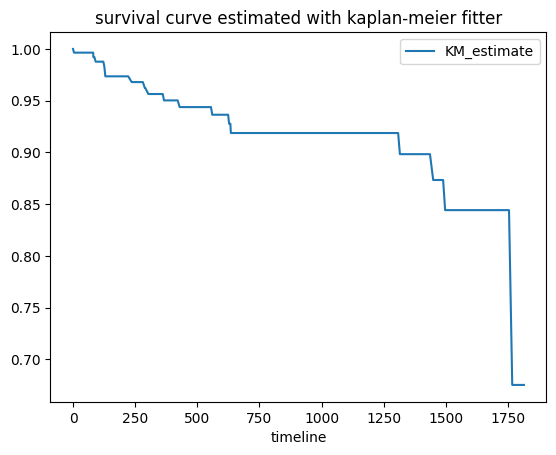

In [45]:
from lifelines import KaplanMeierFitter
kmf = KaplanMeierFitter()
kmf.fit(durations = s.Graft_survival_time, event_observed = s.Graft_survival_censoring_indicator)
kmf.survival_function_.plot()
plt.title('survival curve estimated with kaplan-meier fitter')
plt.show()

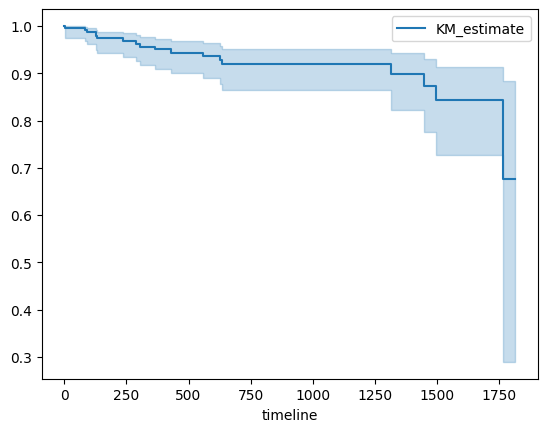

In [46]:
kmf.plot_survival_function()
plt.show()

In [47]:
from lifelines import CoxPHFitter
coxph = CoxPHFitter()
coxph.fit(s, duration_col = 'Graft_survival_time', event_col = 'Graft_survival_censoring_indicator')
coxph.print_summary()

<lifelines.CoxPHFitter: fitted with 278 total observations, 260 right-censored observations>
             duration col = 'Graft_survival_time'
                event col = 'Graft_survival_censoring_indicator'
      baseline estimation = breslow
   number of observations = 278
number of events observed = 18
   partial log-likelihood = -39.63
         time fit was run = 2023-03-16 16:35:19 UTC

---
                                                            coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                                                         
Blood_Urea_Nitrogen_level                                   0.05       1.05       0.03            -0.02             0.11                 0.98                 1.12
Body_mass_index                                             0.04       1.04       0.06            -0.09             0.16                 0.92                 1.18
Calcium_level                                              -0.53       0.59       0.36            -1.23             0.17                 0.29                 1.19
Diastolic_blood_pressure                                   -0.09       0.91       0.08            -0.24             0.06                 0.78                 1.06
Donor_age                                                  -0.13       0.88       0.06            -0.25            -0.00                 0.78                 1.00
eGFR                                                       -0.16       0.85       0.07            -0.29            -0.03                 0.75                 0.97
Glucose_level                                              -0.01       0.99       0.02            -0.05             0.04                 0.95                 1.04
Hemoglobin_level                                            0.51       1.67       0.34            -0.15             1.17                 0.86                 3.23
Phosphorus_level                                           -0.02       0.98       0.85            -1.69             1.65                 0.18                 5.19
Platelets                                                   0.01       1.01       0.01            -0.00             0.03                 1.00                 1.03
Potassium_level                                            -1.17       0.31       1.01            -3.16             0.81                 0.04                 2.25
Recipients_age                                             -0.12       0.88       0.09            -0.29             0.04                 0.75                 1.04
Serum_creatinine_level                                     -0.03       0.97       0.04            -0.11             0.05                 0.89                 1.05
Sodium_level                                                0.01       1.01       0.06            -0.11             0.14                 0.89                 1.15
Systolic_blood_pressure                                     0.02       1.02       0.03            -0.05             0.08                 0.95                 1.09
Tacrolimus_Modified_Release                                -0.12       0.88       0.23            -0.57             0.33                 0.56                 1.39
White_blood_cell_count                                     -0.11       0.90       0.31            -0.73             0.51                 0.48                 1.66
Blood_Urea_Nitrogen_level_to_Serum_creatinine_level_ratio   0.42       1.52       0.27            -0.10             0.94                 0.90                 2.57
An_episode_of_acute_rejection                              -0.03       0.97       0.98            -1.94             1.88                 0.14                 6.58
An_episode_of_chronic_rejection                            -2.10       0.12       1.02            -4.10            -0.10                 0.02                 0.91
An_episode_of_h

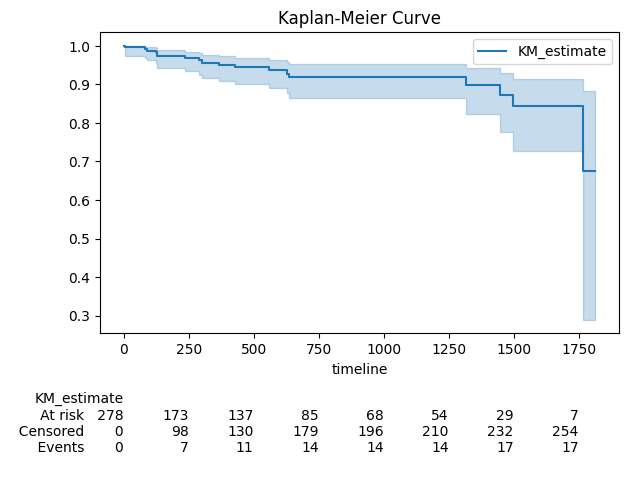

In [48]:
from lifelines import KaplanMeierFitter 

T = s['Graft_survival_time'] # months
E = s['Graft_survival_censoring_indicator']

kmf = KaplanMeierFitter()
kmf.fit(T, event_observed=E)

kmf.plot(at_risk_counts=True)
plt.title('Kaplan-Meier Curve');

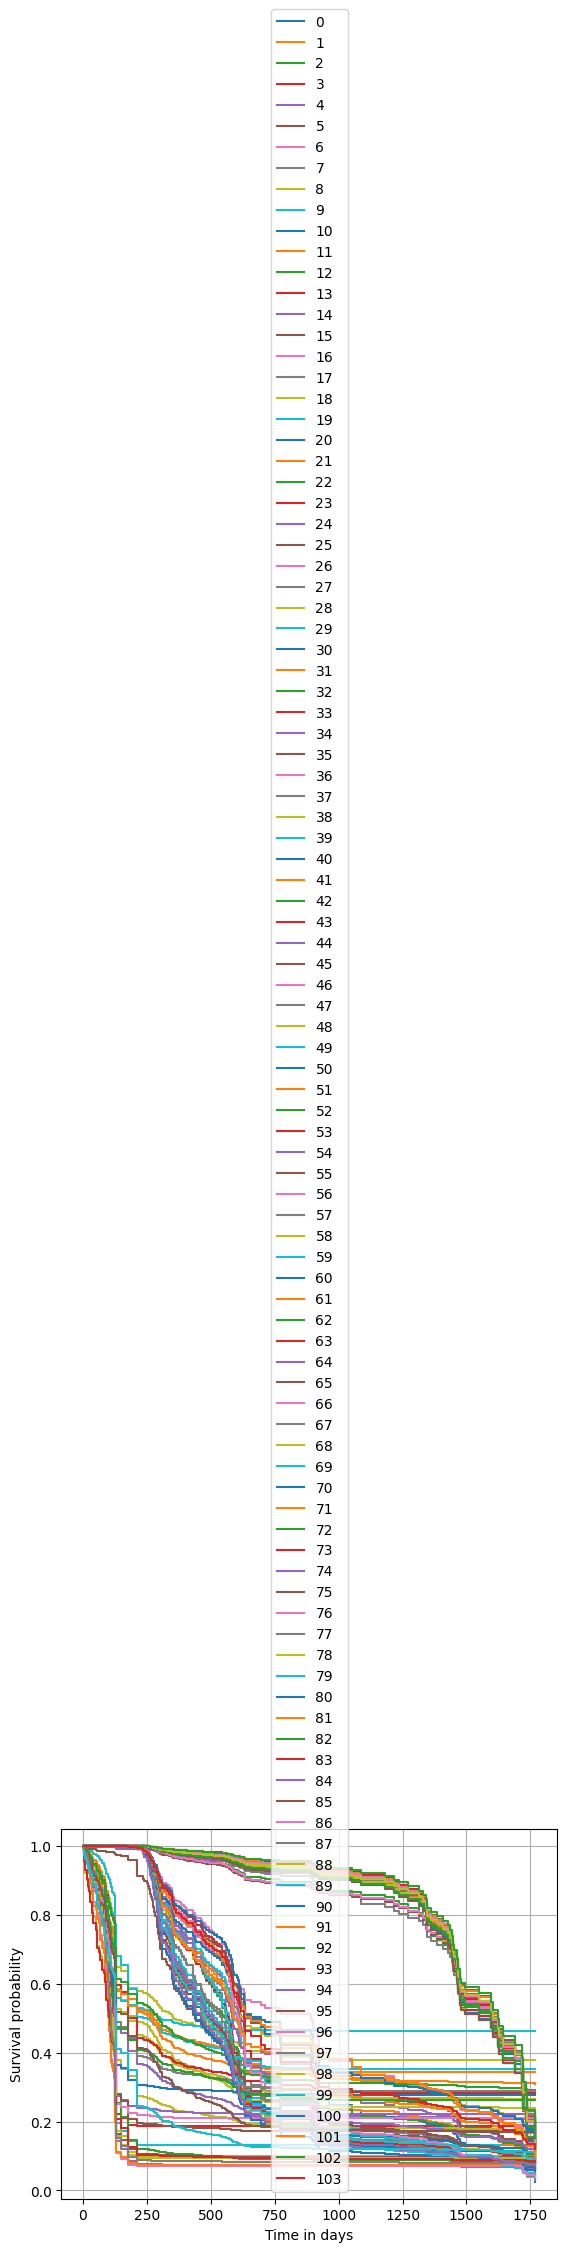

In [49]:
surv_rsf = rsf.predict_survival_function(x_test, return_array=True)

for i, s in enumerate(surv_rsf):
    plt.step(rsf.event_times_, s, where="post", label=str(i))
plt.ylabel("Survival probability")
plt.xlabel("Time in days")
plt.legend()
plt.grid(True)

In [50]:
pickle.dump(rsf,open("rsf2.pkl","wb"))